# Proyek Pertama: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Reisya Junita Putri
- Email: reisyajunita@gmail.com
- ID Dicoding: reisyajunita

## Persiapan

### Import Library

In [1]:

# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries untuk pra pemrosesan data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Libraries untuk modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)  
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


# Abaikan Warning
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
# Memuat Dataset
df = pd.read_csv('employee_data.csv')

## Data Understanding

**Employee Attrition Dataset Description**

Berikut adalah deskripsi masing-masing kolom dalam dataset:

| Feature | Description |
|---------|-------------|
| **EmployeeId** | Employee Identifier (ID unik untuk setiap karyawan) |
| **Attrition** | Apakah karyawan mengalami attrition? (`0` = Tidak, `1` = Ya) |
| **Age** | Usia karyawan |
| **BusinessTravel** | Komitmen perjalanan dinas untuk pekerjaan |
| **DailyRate** | Gaji harian |
| **Department** | Departemen tempat karyawan bekerja |
| **DistanceFromHome** | Jarak dari rumah ke tempat kerja (dalam km) |
| **Education** | Tingkat pendidikan: `1` = Di bawah perguruan tinggi, `2` = Perguruan tinggi, `3` = Sarjana, `4` = Magister, `5` = Doktor |
| **EducationField** | Bidang pendidikan |
| **EnvironmentSatisfaction** | Tingkat kepuasan terhadap lingkungan kerja: `1` = Rendah, `2` = Sedang, `3` = Tinggi, `4` = Sangat Tinggi |
| **Gender** | Jenis kelamin karyawan |
| **HourlyRate** | Gaji per jam |
| **JobInvolvement** | Tingkat keterlibatan kerja: `1` = Rendah, `2` = Sedang, `3` = Tinggi, `4` = Sangat Tinggi |
| **JobLevel** | Level pekerjaan (1 sampai 5) |
| **JobRole** | Peran pekerjaan |
| **JobSatisfaction** | Tingkat kepuasan kerja: `1` = Rendah, `2` = Sedang, `3` = Tinggi, `4` = Sangat Tinggi |
| **MaritalStatus** | Status pernikahan |
| **MonthlyIncome** | Gaji bulanan |
| **MonthlyRate** | Tarif bulanan |
| **NumCompaniesWorked** | Jumlah perusahaan tempat karyawan pernah bekerja |
| **Over18** | Apakah karyawan berusia di atas 18 tahun? |
| **OverTime** | Apakah karyawan bekerja lembur? |
| **PercentSalaryHike** | Persentase kenaikan gaji tahun lalu |
| **PerformanceRating** | Penilaian kinerja: `1` = Rendah, `2` = Baik, `3` = Sangat Baik, `4` = Luar Biasa |
| **RelationshipSatisfaction** | Tingkat kepuasan hubungan interpersonal: `1` = Rendah, `2` = Sedang, `3` = Tinggi, `4` = Sangat Tinggi |
| **StandardHours** | Jam kerja standar |
| **StockOptionLevel** | Level opsi saham |
| **TotalWorkingYears** | Total tahun pengalaman kerja |
| **TrainingTimesLastYear** | Jumlah pelatihan yang diikuti tahun lalu |
| **WorkLifeBalance** | Keseimbangan kerja-hidup: `1` = Rendah, `2` = Baik, `3` = Sangat Baik, `4` = Luar Biasa |
| **YearsAtCompany** | Jumlah tahun bekerja di perusahaan saat ini |
| **YearsInCurrentRole** | Jumlah tahun dalam peran saat ini |
| **YearsSinceLastPromotion** | Jumlah tahun sejak promosi terakhir |
| **YearsWithCurrManager** | Jumlah tahun bersama manajer saat ini |

In [3]:
print('Data Shape:', df.shape)
print('\nInformasi Dataset:')
df.info()

Data Shape: (1470, 35)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement      

Pada tahap ini, dilakukan untuk melihat bentuk data dan informasi dataset. Diketahui bahwa dataset yang digunakan memiliki **1470 nilai data** dan **35 kolom data**. Pada kolom **Attrition** terdapat *missing values*.

In [4]:
# Mengecek Data Unik
for feature in df:
    if df[feature].dtype == "object":
        print(f'feature {feature}')
        print(df[feature].unique(),'\n')

feature BusinessTravel
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel'] 

feature Department
['Human Resources' 'Research & Development' 'Sales'] 

feature EducationField
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources'] 

feature Gender
['Male' 'Female'] 

feature JobRole
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative'] 

feature MaritalStatus
['Married' 'Single' 'Divorced'] 

feature Over18
['Y'] 

feature OverTime
['Yes' 'No'] 



In [5]:
# Melihat Seluruh Kolom Dataset
pd.options.display.max_columns = 100
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


**Insight**

Untuk kolom 'Gender' yang hanya memiliki dua nilai unik yaitu 'Male' dan 'Female', akan dilakukan Label Encoding dimana 'Male' akan diubah menjadi nilai 0 dan 'Female' menjadi nilai 1. Proses serupa juga akan diterapkan pada kolom 'OverTime' dimana 'Yes' akan diubah menjadi 1 dan 'No' menjadi 0. Metode ini dipilih karena efisien untuk variabel biner dan tidak menambah kompleksitas dimensi data.

Kolom-kolom seperti 'BusinessTravel', 'Department', 'EducationField', 'MaritalStatus', dan 'JobRole' memiliki lebih dari dua kategori. Untuk itu, akan digunakan metode One-Hot Encoding. Metode ini akan membuat kolom baru untuk setiap kategori dalam setiap kolom tersebut. Hal ini penting untuk memastikan model tidak mengasumsikan adanya urutan atau tingkatan antar kategori.



In [6]:
# Mengecek Duplikasi Data
print('Jumlah Duplikasi Data:', df.duplicated().sum())

# Melihat jumlah missing values
print('Jumlah Missing Values:')
df.isna().sum()

Jumlah Duplikasi Data: 0
Jumlah Missing Values:


EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Pada tahap pengecekan duplikasi data, diketahui bahwa **tidak ada data yang terduplikasi**. Ini dapat diartikan, bahwa pada dataset employee adalah dataset bersih dari duplikasi.

Di dapat bahwa benar ada *missing values* pada kolom **Attrition** sebanyak **412 nilai data**. Pada tahap preparation, akan dilakukan pembersihan data kosong dengan fungsi `dropna()`.


           Jumlah Sample  Persentase (%)
Attrition                               
0.0                  879            59.8
1.0                  179            12.2


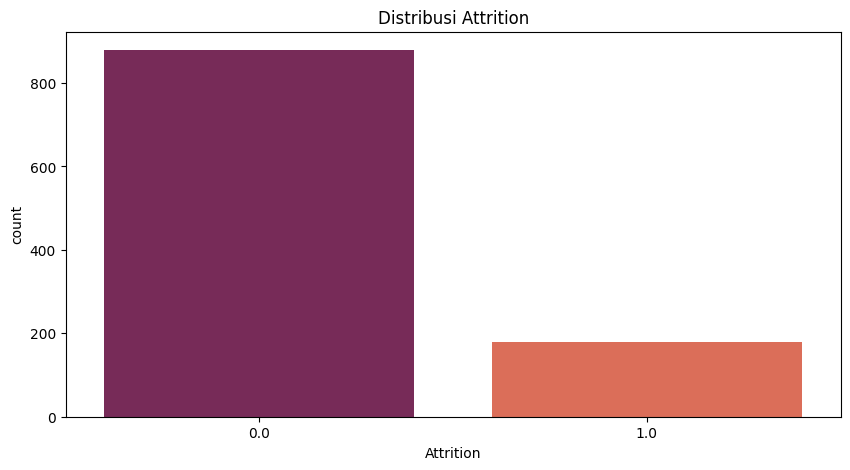

In [7]:
# Distribusi Attrition
feature = 'Attrition'
count = df[feature].value_counts()
total_samples = len(df)
percent = (100 * count / total_samples).round(1)
df_feature = pd.DataFrame({'Jumlah Sample': count, 'Persentase (%)': percent})
print(df_feature)

# Visualisasi Distribusi Attrition
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=feature, palette='rocket')
plt.title(f'Distribusi {feature}')
plt.show()

Pada pivot table **Attrition**, diketahui bahwa **kelas attrition 0 (karyawan yang bertahan)** memiliki jumlah sample sebanyak **879 data atau 59.8%**, untuk **kelas attrition 1 (karyawan yang resign)** terdapat **179 data atau 12.2%**, dan sisanya adalah nilai yang hilang atau *missing values*. 

Dan ini menunjukkan ketidakseimbangan kelas yang cukup signifikan, perlu dilakukannya pemrosesan untuk modeling nanti agar data siap digunakan dengan baik.



## Data Visualization

#### **Categorical Columns**

In [8]:
# Ambil nama kolom bertipe object (kategorikal)
features_cat1 = df.select_dtypes(include='object').columns.tolist()

# Tambahkan fitur kategorikal lain yang bertipe numerik
features_cat2 = [
    'Education', 'EnvironmentSatisfaction', 'PerformanceRating',
    'StockOptionLevel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
    'WorkLifeBalance', 'RelationshipSatisfaction'
]

# Gabungkan dan hilangkan duplikat (jika ada)
features_cat = list(dict.fromkeys(features_cat1 + features_cat2))

for feature in features_cat:
    print(f"Analisis Fitur '{feature}'")
    count = df[feature].value_counts()
    total_samples = len(df)
    percent = (100 * count / total_samples).round(1)
    df_feature = pd.DataFrame({'Jumlah Sample': count, 'Persentase (%)': percent})
    print(df_feature)
    print("\n" + "="*60 + "\n")

Analisis Fitur 'BusinessTravel'
                   Jumlah Sample  Persentase (%)
BusinessTravel                                  
Travel_Rarely               1043            71.0
Travel_Frequently            277            18.8
Non-Travel                   150            10.2


Analisis Fitur 'Department'
                        Jumlah Sample  Persentase (%)
Department                                           
Research & Development            961            65.4
Sales                             446            30.3
Human Resources                    63             4.3


Analisis Fitur 'EducationField'
                  Jumlah Sample  Persentase (%)
EducationField                                 
Life Sciences               606            41.2
Medical                     464            31.6
Marketing                   159            10.8
Technical Degree            132             9.0
Other                        82             5.6
Human Resources              27             1.8


Ana

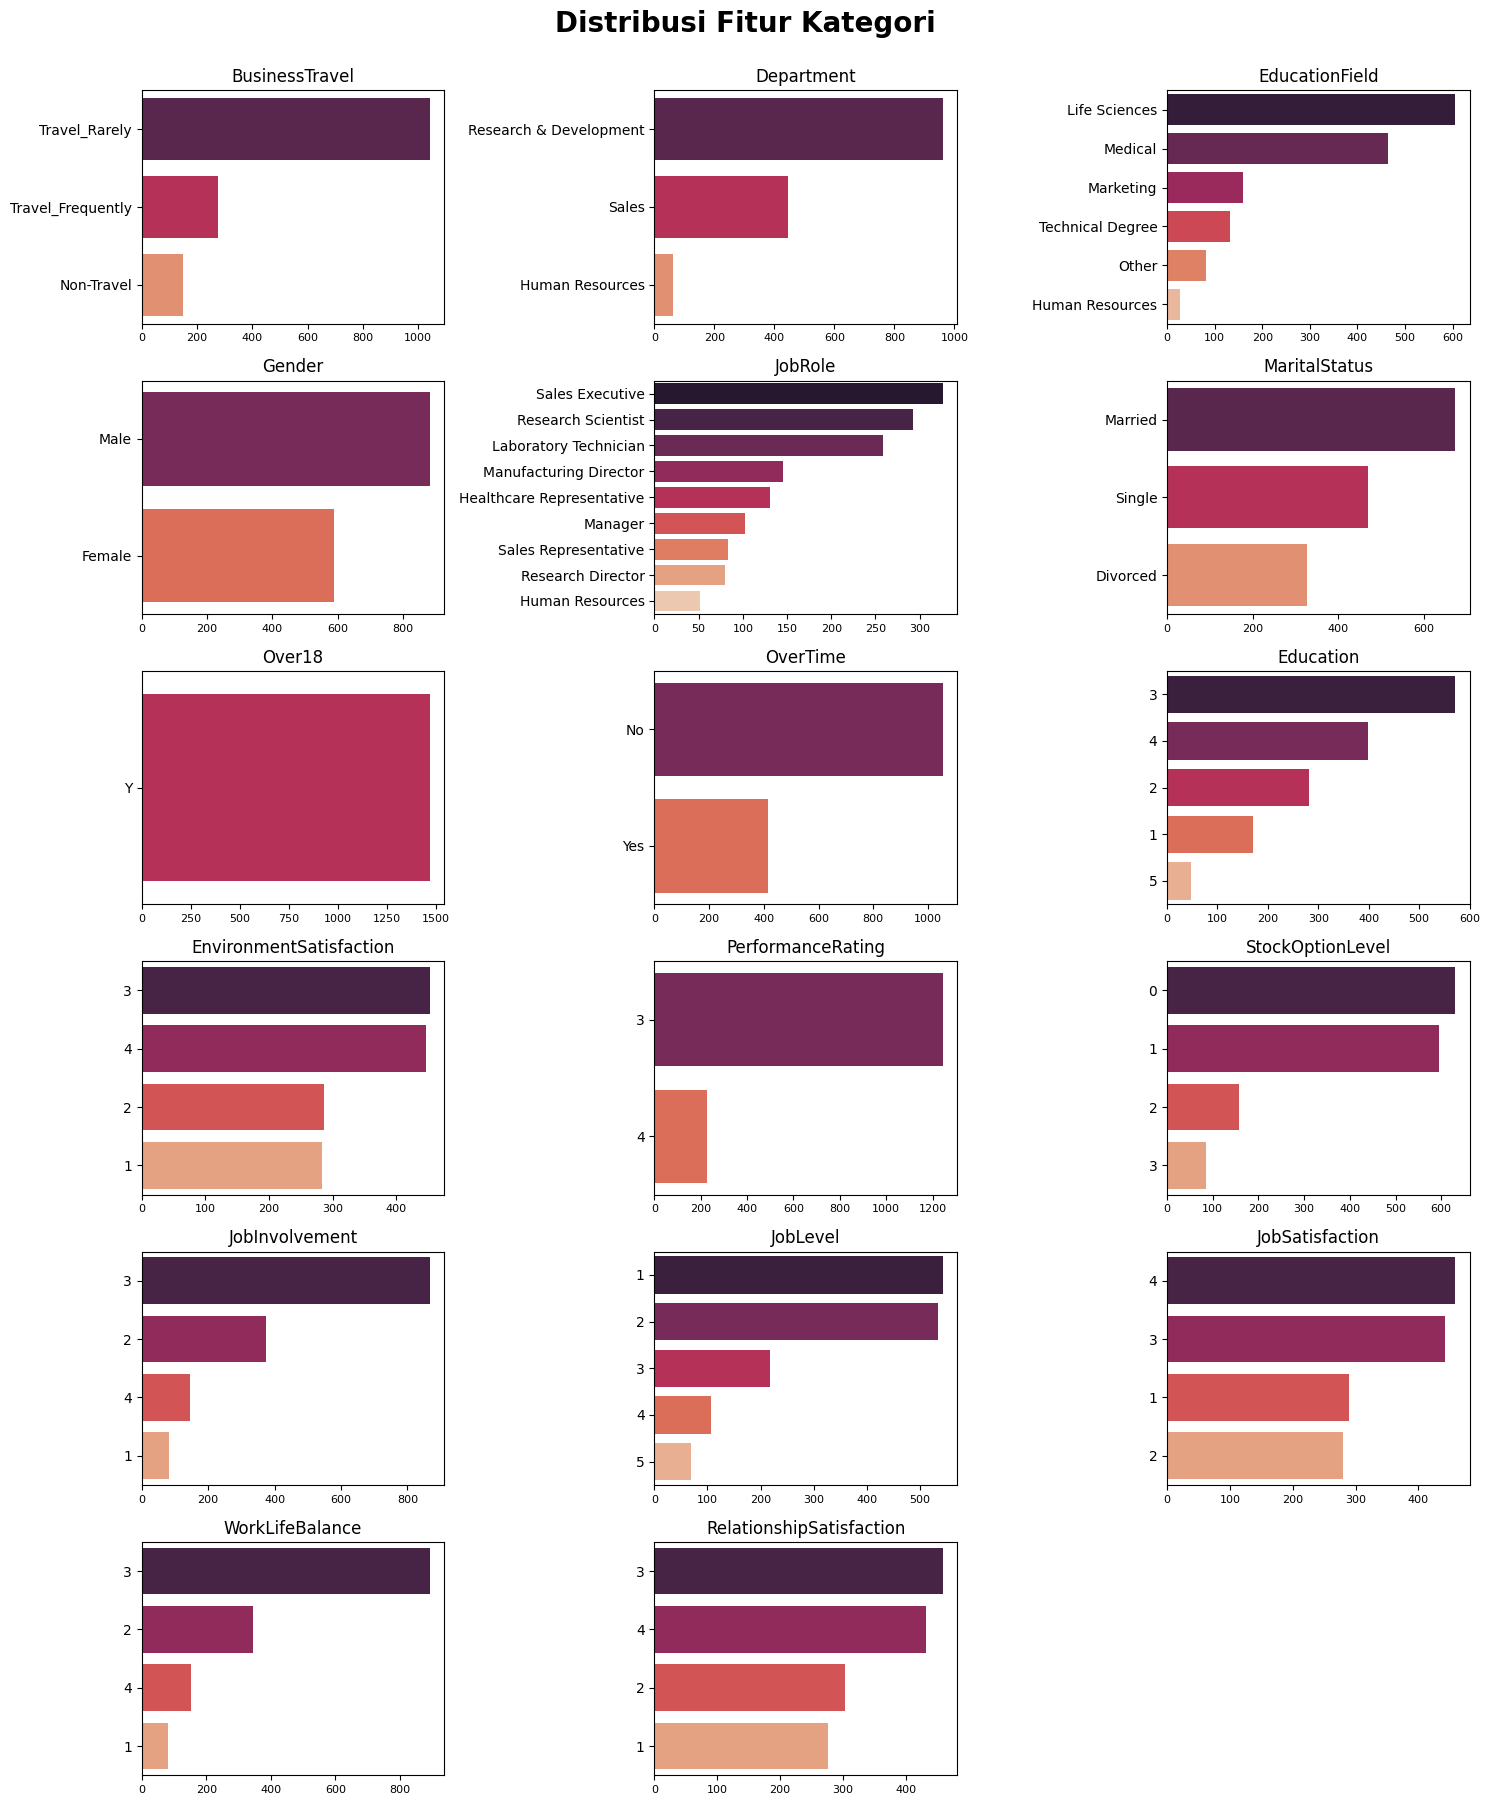

In [9]:
# Visualisasi Categorical Columns
n_features = len(features_cat)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols


plt.figure(figsize=(n_cols*5, n_rows*3))

for idx, feature in enumerate(features_cat):
    plt.subplot(n_rows, n_cols, idx+1)
    order = df[feature].value_counts().index
    sns.countplot(data=df, y=feature, order=order, palette='rocket')
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=0, fontsize=8)
    plt.tight_layout()

plt.suptitle('Distribusi Fitur Kategori', fontsize=20, y=1, fontweight='bold')
plt.tight_layout()
plt.show()

Berikut adalah beberapa insight yang dapat ditarik dari analisis fitur-fitur di atas:
- **BusinessTravel**: Sebagian besar karyawan (`71%`) jarang melakukan perjalanan bisnis (`Travel_Rarely`). Hanya sebagian kecil yang sering berpergian (`Travel_Frequently`) sebesar (`18.8%`). Ini bisa mengindikasikan bahwa sebagian besar pekerjaan bersifat stationer.

- **Department**: Mayoritas karyawan (`65.4%`) bekerja di departemen `Research & Development`. Departemen `Sales` memiliki proporsi yang cukup signifikan (`30.3%`), sementara `Human Resources` memiliki jumlah karyawan yang jauh lebih sedikit (`4.3%`). Ini memberikan gambaran mengenai struktur organisasi perusahaan.

- **EducationField**: Bidang studi `Life Sciences` mendominasi (`41.2%`), diikuti oleh `Medical` (`31.6%`). Bidang lain seperti `Marketing`, `Technical Degree`, dan `Other` memiliki proporsi yang lebih kecil, dengan `Human Resources` sebagai yang paling sedikit (`1.8%`). Ini mencerminkan fokus keilmuan utama di dalam perusahaan.

- **Gender**: Terdapat ketidakseimbangan gender, dengan mayoritas karyawan adalah `laki-laki` (`60.0%`), dan `perempuan` sebanyak (`40.0%`).

- **JobRole**: Peran `Sales Executive` merupakan yang paling umum (`22.2%`), disusul oleh `Research Scientist` (`19.9%`) dan `Laboratory Technician` (`17.6%`). Peran `Human Resources` memiliki proporsi terkecil (`3.5%`). Ini sejalan dengan distribusi pada fitur departemen.

- **MaritalStatus**: Sebagian besar karyawan berstatus `Married` (`45.8%`), diikuti oleh `Single` (`32.0%`) dan `Divorced` (`22.2%`).

- **Over18**: Seluruh karyawan dalam data (`100.0%`) berusia di atas 18 tahun. Karena konstan, fitur ini tidak informatif untuk analisis atau pemodelan lebih lanjut.

- **OverTime**: Mayoritas karyawan tidak melakukan lembur (`No - 71.7%`), sementara sisanya (`28.3%`) bekerja lembur (`Yes`). Fitur ini dapat berpengaruh terhadap analisis kepuasan atau kemungkinan attrition.

- **Education**: Tingkat pendidikan `3` merupakan yang paling umum (`38.9%`), diikuti oleh tingkat `4` (`27.1%`). Ini menunjukkan bahwa mayoritas karyawan memiliki pendidikan yang relatif tinggi.

- **EnvironmentSatisfaction**: Tingkat kepuasan terhadap lingkungan kerja cukup tersebar, dengan level `3` (`30.8%`) dan `4` (`30.3%`) sebagai yang tertinggi, diikuti oleh level `2` (`19.5%`) dan `1` (`19.3%`).

- **PerformanceRating**: Mayoritas karyawan (`84.6%`) memiliki rating kinerja `3`, sedangkan `15.4%` lainnya berada di rating `4`. Tidak ada rating yang lebih rendah dari itu.

- **StockOptionLevel**: Sebagian besar karyawan tidak memiliki opsi saham (`level 0 - 42.9%`), diikuti oleh `level 1` (`40.5%`). Level `2` dan `3` jauh lebih sedikit.

- **JobInvolvement**: Tingkat keterlibatan kerja terbanyak adalah level `3` (`59.0%`), disusul oleh level `2` (`25.5%`). Level `4` dan `1` lebih jarang muncul.

- **JobLevel**: Level pekerjaan `1` (`36.9%`) dan `2` (`36.3%`) mendominasi, menunjukkan bahwa sebagian besar karyawan berada pada tingkat jabatan awal hingga menengah.

- **JobSatisfaction**: Distribusi kepuasan kerja cukup merata, dengan level `4` (`31.2%`), level `3` (`30.1%`), level `1` (`19.7%`), dan level `2` (`19.0%`). Tidak ada level yang sangat dominan.

- **WorkLifeBalance**: Mayoritas karyawan menilai keseimbangan kerja-hidup mereka pada level `3` (`60.7%`), diikuti oleh level `2` (`23.4%`). Level `4` dan `1` jarang muncul.

- **RelationshipSatisfaction**: Kepuasan terhadap hubungan kerja terbagi merata antara level `3` (`31.2%`), level `4` (`29.4%`), level `2` (`20.6%`), dan level `1` (`18.8%`).

#### **Numerical Columns**

In [10]:
numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

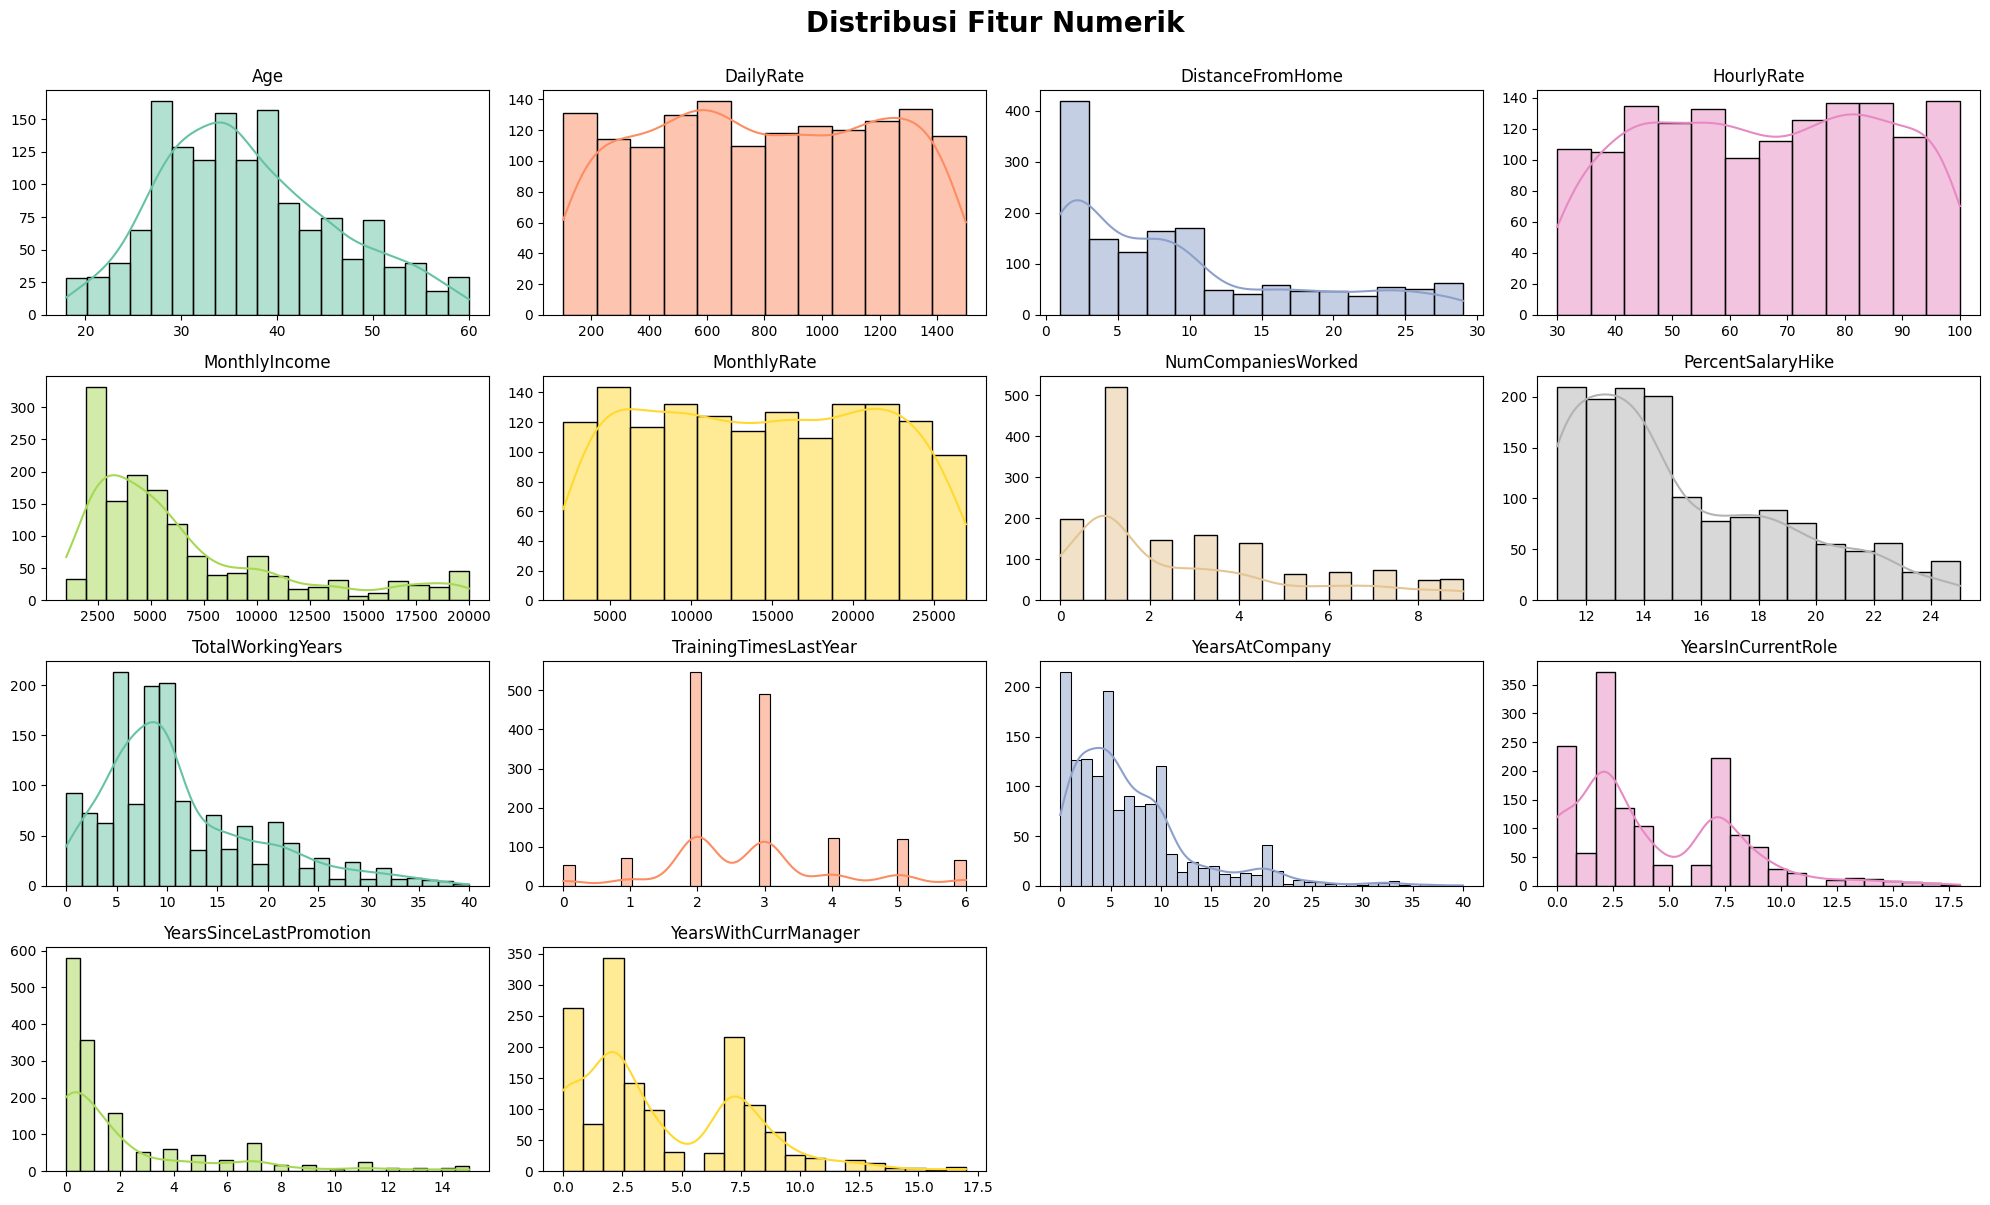

In [11]:
# Visualisasi untuk Fitur Numerik
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols*5, n_rows*3))

for idx, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, idx+1)
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set2")[idx % 8])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    
plt.suptitle('Distribusi Fitur Numerik', fontsize=20, y=1, fontweight='bold')
plt.tight_layout()
plt.show()

Beberapa fitur numerik pada histogram tampak memiliki distribusi yang **condong ke kanan (positively skewed)**, seperti `DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, dan YearsWithCurrManager`. Artinya, mayoritas data terkonsentrasi di nilai rendah, sementara sebagian kecil menunjukkan nilai yang jauh lebih tinggi.

Sementara itu, fitur seperti `Age` dan `TrainingTimesLastYear` menunjukkan sebaran data yang relatif simetris, mendekati distribusi normal, di mana nilai-nilai berada di sekitar titik tengah dengan penyebaran yang cukup merata di kedua sisi.

#### Fitur Kategorikal vs Attrition

In [12]:
def categorical_attrition(df, column, figsize=(10,5), title=None):
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=column, hue='Attrition', palette='rocket')
    plt.xlabel(column)
    plt.ylabel('Jumlah Karyawan')
    if title is None:
        title = f'Distribusi Attrition berdasarkan {column}'
    plt.title(title, fontweight='bold', fontsize=14)
    plt.xticks(rotation=0)
    plt.legend(title='Attrition')
    plt.tight_layout()
    plt.show()

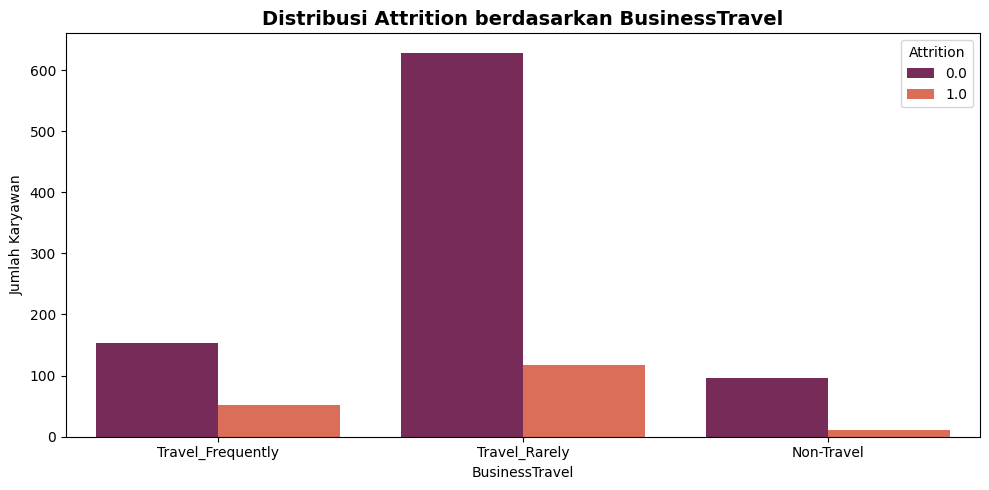

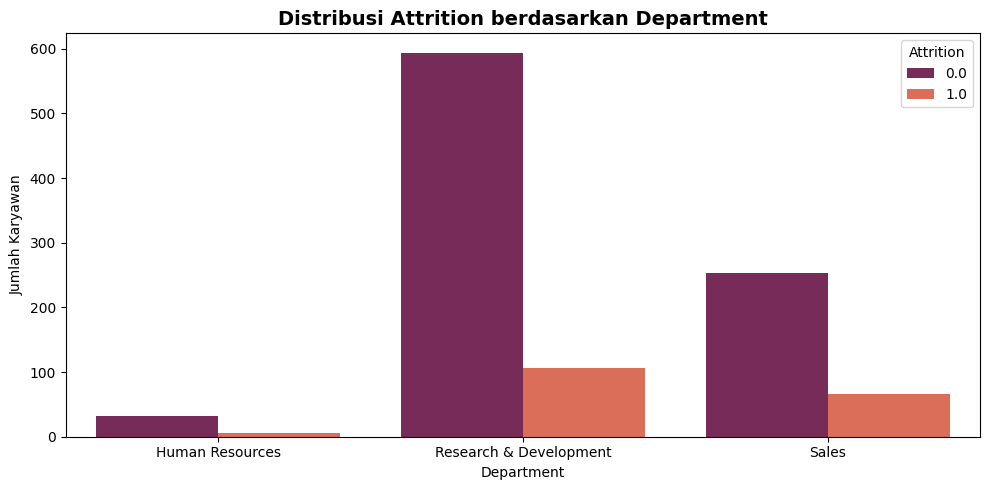

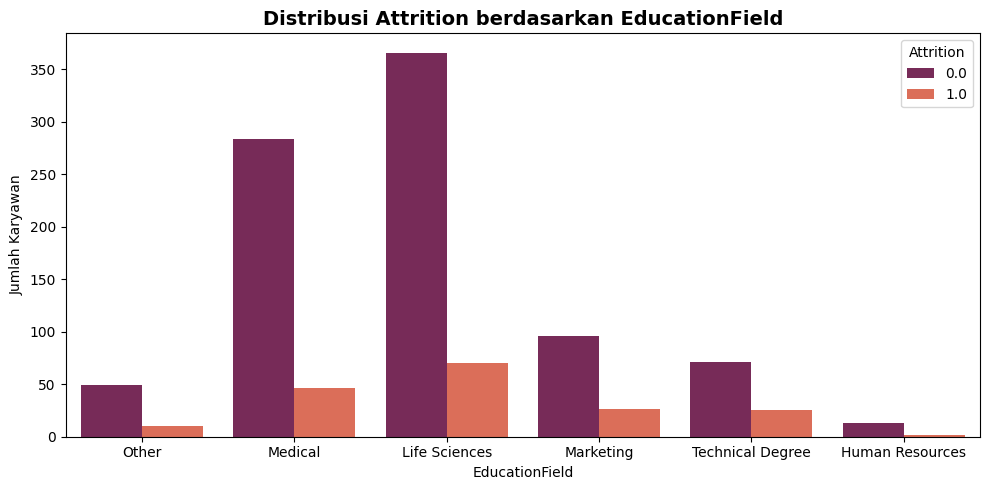

In [13]:
feature_categorical = ['BusinessTravel', 'Department', 'EducationField']
for col in feature_categorical:
    categorical_attrition(df, col)

Beberapa insight yang didapat:
- **Business Travel vs Attrition**
    * Travel_Rarely adalah mayoritas karyawan dengan jumlah attrition tertinggi secara absolut, meski proporsi keluar relatif rendah karena basis besar.
    * Travel_Frequently memiliki proporsi attrition paling tinggi, menandakan risiko keluar lebih besar bagi karyawan yang sering dinas.
    * Non-Travel menunjukkan tingkat attrition terendah, baik secara jumlah maupun proporsi.

    Karyawan yang sering melakukan perjalanan dinas berisiko lebih tinggi untuk keluar, sehingga perlu perhatian khusus dalam retensi. Sementara itu, kelompok Travel_Rarely juga penting karena jumlahnya besar dan kontribusi attrition signifikan.

- **Department vs Attrition**
    * Research & Development memiliki jumlah karyawan dan attrition tertinggi secara absolut, sehingga kontribusi terbesar terhadap total karyawan keluar berasal dari departemen ini.
    * Sales juga menunjukkan angka attrition yang cukup besar, baik dari sisi jumlah maupun proporsi jika dibandingkan total karyawan di departemen tersebut.
    * Human Resources memiliki jumlah karyawan dan attrition paling sedikit.

    Fokus utama retensi sebaiknya diarahkan ke departemen Research & Development dan Sales, karena dua departemen ini menyumbang sebagian besar kasus attrition di perusahaan.

- **Education Field vs Attrition**
    * Life Sciences dan Medical adalah dua bidang pendidikan dengan jumlah karyawan dan kasus attrition terbanyak, sehingga menyumbang attrition terbesar secara absolut.
    * Marketing dan Technical Degree memiliki jumlah attrition sedang, namun proporsinya terhadap total karyawan di bidang tersebut juga cukup signifikan.
    * Human Resources dan Other memiliki jumlah karyawan dan attrition paling sedikit.

    Upaya retensi sebaiknya difokuskan pada karyawan dengan latar belakang pendidikan Life Sciences dan Medical karena mereka mendominasi jumlah kasus attrition di perusahaan.

#### **Fitur Numerik vs Attrition**

In [14]:
def numerical_attrition(df, numerical_col, figsize=(12, 5), bins=30):
    plt.figure(figsize=figsize)
    sns.histplot(
        data=df, 
        x=numerical_col, 
        hue='Attrition', 
        bins=bins, 
        kde=True, 
        palette={0: 'green', 1: 'red'}, 
        alpha=0.6,
        element='step',  # opsi lain: 'bars', 'step', 'poly'
        stat='count'
    )
    plt.title(f'Distribusi {numerical_col} berdasarkan Attrition', fontweight='bold')
    plt.xlabel(numerical_col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

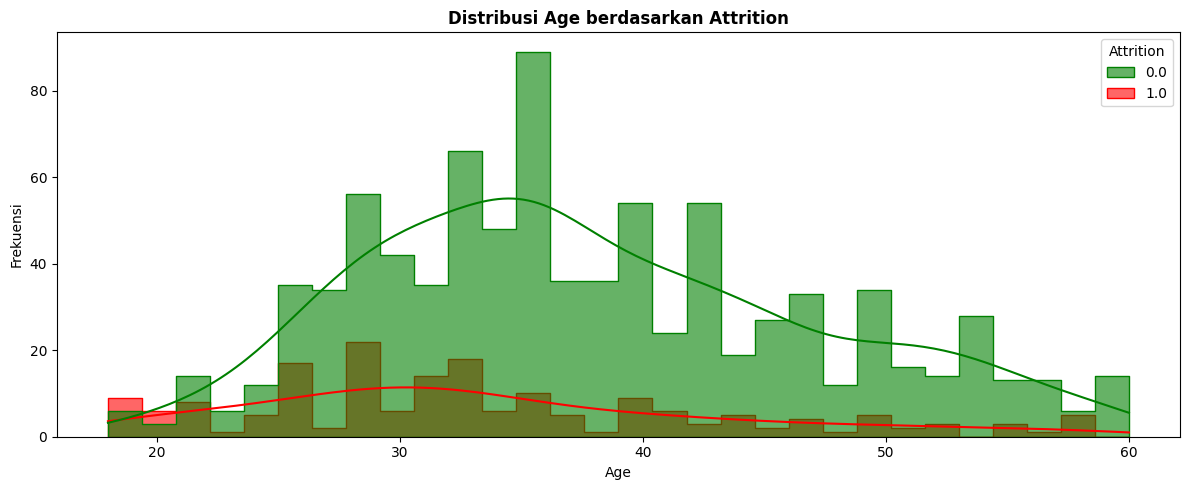

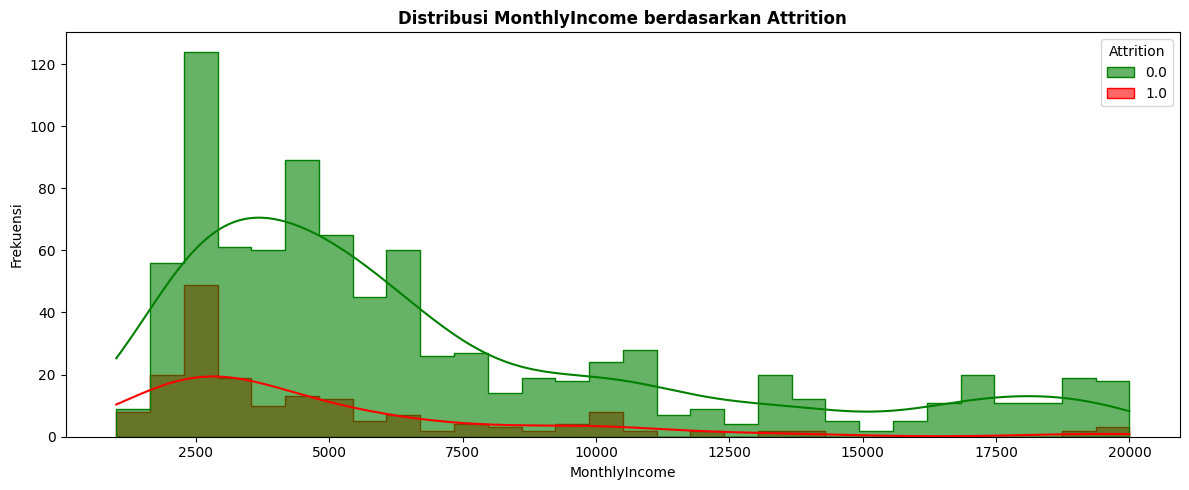

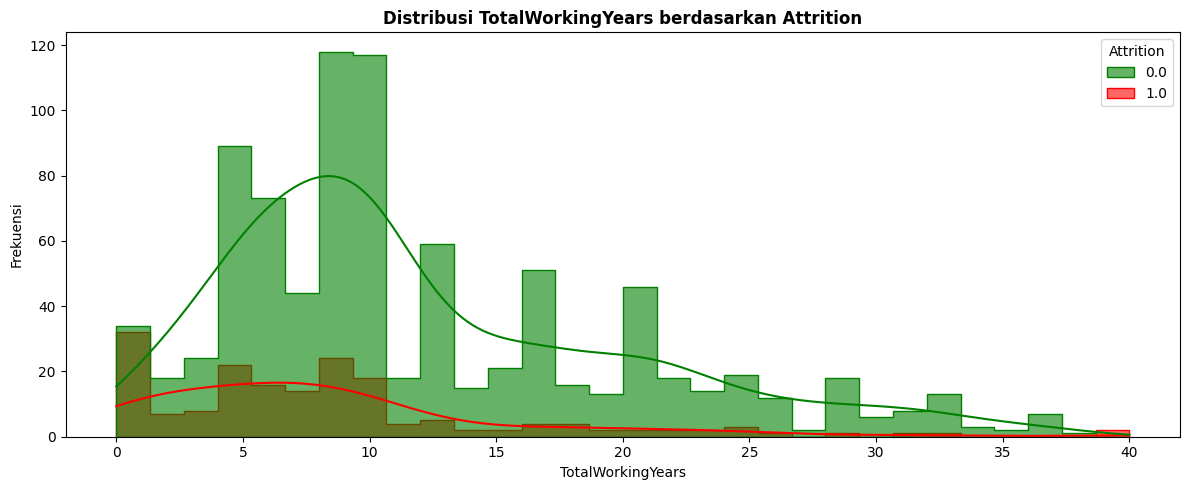

In [15]:
numerical_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears']
for col in numerical_cols:
    numerical_attrition(df, col)

Beberapa insight yang didapat:
- **Age vs Attrtion**
    * Karyawan yang keluar (Attrition = 1) paling banyak berada di rentang usia 25–35 tahun, dengan puncak distribusi di usia sekitar 29–32 tahun.
    * Karyawan yang bertahan (Attrition = 0) tersebar lebih merata di seluruh rentang usia, namun jumlah terbesar juga ada di usia 28–35 tahun.
    * Setelah usia 40 tahun, baik karyawan yang keluar maupun yang bertahan jumlahnya menurun tajam, dan attrition pada usia di atas 45 tahun sangat sedikit.
    * Proporsi attrition relatif lebih tinggi di kelompok usia muda (di bawah 35 tahun) dibandingkan kelompok usia lebih tua.

    Karyawan muda (terutama usia 25–35 tahun) memiliki risiko keluar yang lebih tinggi. Perusahaan sebaiknya fokus pada retensi dan pengembangan karier untuk kelompok usia ini agar tingkat attrition dapat ditekan.

- **Monthly Income vs Attrition**
    * Karyawan yang keluar (Attrition = 1) paling banyak memiliki pendapatan bulanan di bawah 5.000, dengan puncak pada rentang 2.000–4.000.
    * Karyawan yang bertahan (Attrition = 0) juga didominasi oleh kelompok berpenghasilan rendah hingga menengah, namun distribusinya lebih merata dan jumlahnya jauh lebih besar di semua rentang pendapatan.
    * Semakin tinggi pendapatan bulanan, baik jumlah karyawan yang keluar maupun bertahan semakin menurun, dan sangat sedikit kasus attrition pada pendapatan di atas 10.000.
    * Proporsi attrition lebih tinggi pada kelompok berpendapatan rendah dibandingkan kelompok berpendapatan tinggi.

    Karyawan dengan pendapatan bulanan rendah lebih berisiko keluar dari perusahaan. Upaya retensi sebaiknya difokuskan pada kelompok ini, misalnya dengan meninjau kembali kebijakan kompensasi atau memberikan insentif tambahan bagi karyawan berpenghasilan rendah.

- **Total Working Years vs Attrition**
    * Karyawan yang keluar (Attrition = 1) paling banyak memiliki total pengalaman kerja antara 0 hingga 10 tahun, dengan puncak pada 2–8 tahun.
    * Karyawan yang bertahan (Attrition = 0) juga didominasi oleh kelompok dengan pengalaman kerja rendah hingga menengah, namun jumlahnya jauh lebih besar dan distribusinya lebih merata hingga sekitar 20 tahun.
    * Setelah 15 tahun pengalaman kerja, baik jumlah karyawan yang keluar maupun bertahan menurun drastis, dan attrition pada kelompok dengan pengalaman di atas 20 tahun sangat sedikit.
    * Proporsi attrition tertinggi terdapat pada karyawan dengan pengalaman kerja di bawah 10 tahun.

    Karyawan dengan pengalaman kerja total rendah hingga menengah (khususnya di bawah 10 tahun) memiliki risiko keluar yang lebih tinggi. Perusahaan sebaiknya memberikan perhatian lebih pada pengembangan karier dan retensi untuk kelompok karyawan dengan pengalaman kerja relatif singkat.

## Data Preparation / Preprocessing

### Penanganan Missing Values

In [16]:
# Bersihkan missing value pada kolom target 'Attrition'
df.dropna(subset=['Attrition'], inplace=True)

Menghapus baris yang memiliki nilang kosong pada fitur target (`Attrition`) agara tidak mengganggu proses pelatihan model dan data menjadi bersih.

In [17]:
df.isna().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Label Encoding

In [18]:
# Variabel Biner: Gender, Over18, OverTime
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Over18', 'OverTime']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

Untuk variabel kategorikal dengan kelas binary, menggunakan metode Label Encoder untuk mengubah kategori menjadi numerik (0 dan 1). Hal ini penting karena model hanya bekerja dengan data numerik.

### One-Hot Encoding

In [19]:
# One-Hot Encoding: Business Travel, Department, Education Field, Job Role, dan Marital Status
df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel', axis=1)
df = df.join(pd.get_dummies(df['Department'], prefix='Department')).drop('Department', axis=1)
df = df.join(pd.get_dummies(df['EducationField'], prefix='Education')).drop('EducationField', axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix='Job')).drop('JobRole', axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix='Status')).drop('MaritalStatus', axis=1)

Untuk fitur kategorikal dengan banyak kelas, menggunakan metode One-Hot Encoding, karena tidak memaksakan urutan antar kategori.

### Konversi Nilai Boolean ke Numerik

In [20]:
# Merubah nilai True dan False menjadi 1 dan 0
df = df.map(lambda x: 1 if x is True else 0 if x is False else x)
df

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Job_Healthcare Representative,Job_Human Resources,Job_Laboratory Technician,Job_Manager,Job_Manufacturing Director,Job_Research Director,Job_Research Scientist,Job_Sales Executive,Job_Sales Representative,Status_Divorced,Status_Married,Status_Single
1,2,37,1.0,1141,11,2,1,1,0,61,1,2,2,4777,14382,5,0,0,15,3,1,80,0,15,2,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3,51,1.0,1323,4,4,1,1,1,34,3,1,3,2461,10332,9,0,1,12,3,3,80,3,18,2,4,10,0,2,7,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,42,0.0,555,26,3,1,3,0,77,3,4,2,13525,14864,5,0,0,14,3,4,80,1,23,2,4,20,4,4,8,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,7,40,0.0,1124,1,2,1,2,1,57,1,2,4,7457,13273,2,0,1,22,4,3,80,3,6,2,2,4,3,0,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,8,55,1.0,725,2,3,1,4,1,78,3,5,1,19859,21199,5,0,1,13,3,4,80,1,24,2,3,5,2,1,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,1366,24,2,1,2,1,72,2,3,1,8722,12355,1,0,0,12,3,1,80,0,10,2,2,10,7,1,9,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1465,1466,38,0.0,168,1,3,1,3,0,81,3,3,3,7861,15397,4,0,1,14,3,4,80,0,10,4,4,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1467,1468,28,1.0,1485,12,1,1,3,0,79,3,1,4,2515,22955,1,0,1,11,3,4,80,0,1,4,2,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1468,1469,40,0.0,458,16,2,1,3,1,74,3,1,3,3544,8532,9,0,0,16,3,2,80,1,6,0,3,4,2,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


Pada tahap ini, mengubah nilai `True/False` menjadi `1/0` supaya tetap konsisten dengan format numerik yang dibutuhkan model. 

### Menghapus Kolom Yang Tidak Relevan

Kolom yang akan dihapus 'EmployeeCount', 'Over18', 'StandardHours', dan EmployeeId'.

In [21]:
df = df.drop(['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

Pada tahap ini, kolom-kolom ini tidak relevan sehingga perlu dihapus. 

### Splitting Data

Pada tahap ini bertujuan untuk memisahkan fitur `X` dan label `y`, serta membagi data ke dalam data latih (train) dan data uji (test). `test_size=0.2`, artinya 20% data digunakan untuk pengujian, sisanya untuk pelatihan.

In [22]:
# Splitting Data
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Modeling

Pada tahap modeling, menggunakan algoritma Random Forest. karena algoritma tersebut lebih stabil dan akurat, robust terhadap overfitting, memberikan feature importance, dan mendukung pipline dan tuning hyperparameter dengan baik (melalui GridSearchCv).

In [23]:
# Param Grid untuk Hyperparameter Tuning (GridSearch)
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_leaf': [5, 10],
    'rf__max_features': ['sqrt', 'log2']
}

Pada tahap ini, menggunakan hyperparameter tuning untuk GridSearchCV dalam menentukan kombinasi hyperparameter terbaik. 

Prefix `rf__` inisial ini menyesuaikan dengan nama step di pipeline.

- `n_estimators`: jumlah pohon pada Random Forest.
- `max_depth`: kedalaman maksimum pohon.
- `min_samples_leaf`: jumlah minimal sampel di daun pohon.
- `max_features`: fitur yang dipertimbangkan saat split.

In [24]:
# Pipeline: SMOTE + RandomForestClassifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

Pada tahap ini, pipeline menyatukan SMOTE dan Random Forest dalam satu alur. Pipeline ini penting supaya SMOTE hanya diterapkan di dalam training set saat validasi silang (GridSearchCV), bukan ke seluruhan data.

Menggunakan SMOTE, karena terdapat ketidakseimbangan kelas (imbalance) `Attrition`. Dengan menggunakan SMOTE dapat meningkatkan recall dan f1-score untuk kelas karyawan yang keluar, mengurangi bias ke kelas mayoritas (karyawan yang tidak keluar), dan meningkatkan generalisasi model pada data yang imbalanced.

In [25]:
# GridSearchCV dengan Pipeline
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

Pada tahap ini, mencari kombinasi prameter terbaik menggunakan 5-fold-cross-validation. Di mana pada `scoring='f1'` digunakan karena data imbalance.

In [26]:
# Fit model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__min_samples_leaf': [5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

Melatih model dengan semua kombinasi hyperparameter di `param_grid` menggunakan data latih (train).

## Evaluation

In [27]:
# Prediksi dengan
best_model = grid_search.best_estimator_
y_pred_smote = best_model.predict(X_test)

Pada tahap ini, mengambil model terbaik hasil `GridSearchCV` dan melakukan prediksi terhadap data uji (test).

In [28]:
# Evaluasi
print("Best Parameters:", grid_search.best_params_)
print("Classification Report (SMOTE + Tuned RF):")
print(classification_report(y_test, y_pred_smote))

Best Parameters: {'rf__max_depth': 10, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 5, 'rf__n_estimators': 300}
Classification Report (SMOTE + Tuned RF):
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       172
         1.0       0.61      0.35      0.44        40

    accuracy                           0.83       212
   macro avg       0.74      0.65      0.67       212
weighted avg       0.81      0.83      0.82       212



In [29]:
# Metrik
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Akurasi  : {accuracy:.4f}")
print(f"Presisi  : {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

Akurasi  : 0.8349
Presisi  : 0.6087
Recall   : 0.3500
F1-Score : 0.4444
ROC AUC  : 0.8195


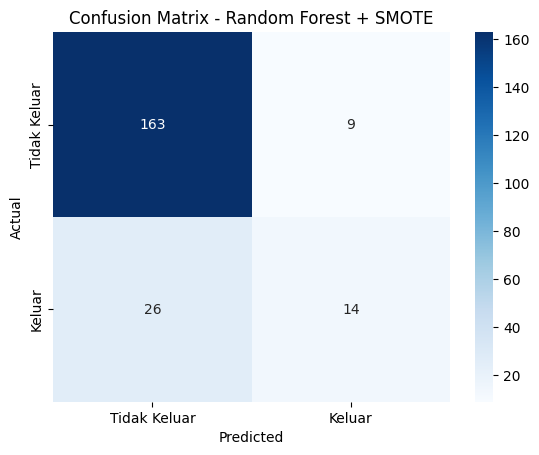

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_smote)
labels = ["Tidak Keluar", "Keluar"]

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest + SMOTE')
plt.show()

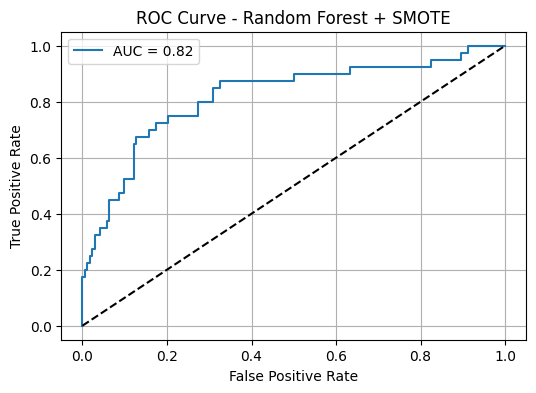

In [31]:
# ROC Curve
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest + SMOTE')
plt.legend()
plt.grid(True)
plt.show()

Pada tahap ini, menunjukkan trade-off antara **True Positive Rate** dan **False Positive Rate**. Semakin ke kiri atas kurva, semakin baik modelnya.

### Feature Importance

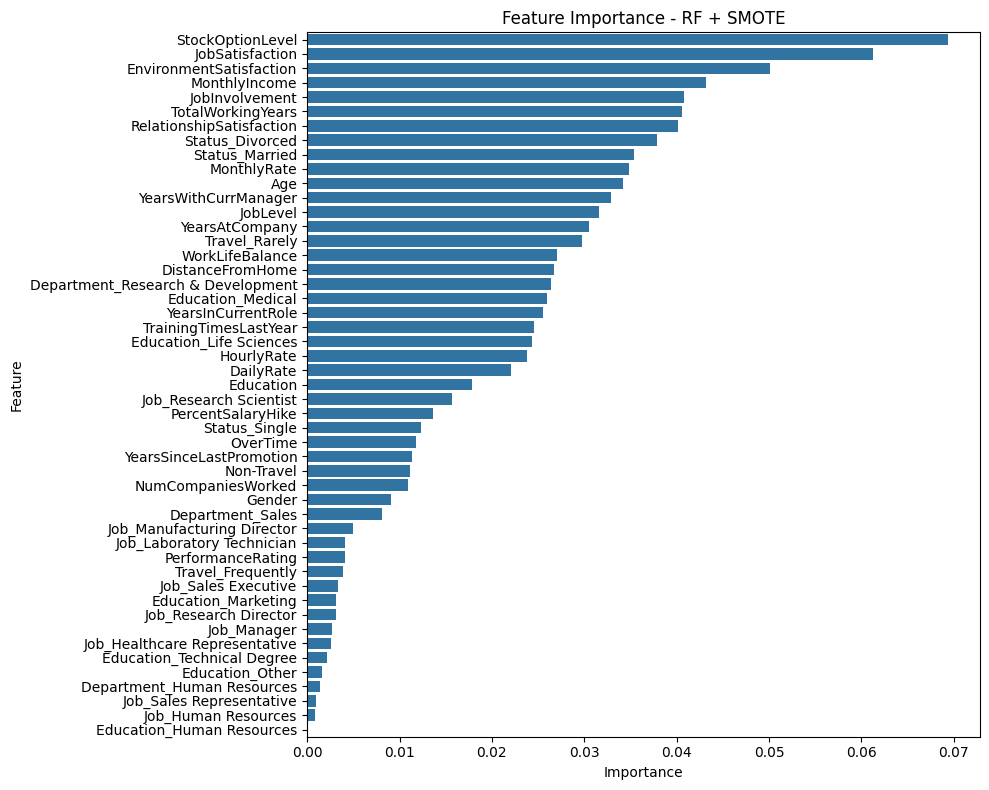

In [32]:
# Feature Importance
rf_model = best_model.named_steps['rf']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance - RF + SMOTE')
plt.tight_layout()
plt.show()

Pada tahap ini, dilakukan untuk menampilkan fitur yang paling berkontribusi terhadap keputusan model. Ini berguna untuk interpretasi dan insight terhadap faktor-faktor yang memengaruhi attrition.




## Kesimpulan

Tingginya attrition rate di Jaya Jaya Maju merupakan isu penting yang memerlukan perhatian. Pemodelan klasifikasi menggunakan Random Forest yang di-tuning dan diatasi ketidakseimbangan datanya dengan SMOTE menghasilkan model dengan akurasi sebesar 0.83 dan skor ROC AUC sebesar 0.82, menunjukkan kemampuan yang baik dalam memprediksi potensi karyawan untuk keluar.

Berdasarkan Classification Report, untuk karyawan yang diprediksi keluar, presisinya adalah 0.61 dan recall-nya adalah 0.35. Ini berarti model cukup baik dalam mengidentifikasi siapa saja yang diprediksi keluar yang sebenarnya keluar, namun masih belum optimal dalam menangkap semua karyawan yang pada kenyataannya akan meninggalkan perusahaan.

Confusion Matrix menunjukkan 163 True Negative, 9 False Positive, 26 False Negative, dan 14 True Positive. Hal ini mengindikasikan bahwa model lebih cenderung memprediksi dengan benar karyawan yang tidak keluar, dan masih terdapat sejumlah karyawan yang sebenarnya keluar namun diprediksi tidak keluar.

Analisis Feature Importance mengidentifikasi beberapa faktor yang paling berpengaruh dalam memprediksi attrition, di antaranya adalah **StockOptionLevel, JobSatisfaction, EnvironmentSatisfaction, MonthlyIncome, JobInvolvement, TotalWorkingYears, dan RelationshipSatisfaction**.

**Rekomendasi Bisnis**

Berdasarkan hasil analisis data dan pemodelan menggunakan Random Forest, terdapat sejumlah faktor utama yang berkontribusi signifikan terhadap kemungkinan karyawan keluar dari perusahaan. Oleh karena itu, berikut ini adalah rekomendasi strategis yang dapat diterapkan oleh manajemen Jaya Jaya Maju:

1. **Optimalkan Program Opsi Saham Karyawan (Stock Option Level)**

    * Tinjau kembali kebijakan pemberian opsi saham sebagai bentuk retensi, terutama bagi karyawan dengan masa kerja lebih panjang atau kinerja tinggi.

    * Sosialisasikan manfaat jangka panjang dari kepemilikan saham perusahaan kepada karyawan agar lebih merasa memiliki dan terikat secara emosional dengan perusahaan.

2. **Tingkatkan Kepuasan Kerja (Job Satisfaction)**

    * Lakukan survei berkala terhadap kepuasan kerja dan tindak lanjuti hasilnya secara konkret.

    * Fokus pada aspek pekerjaan yang sering menjadi keluhan, seperti beban kerja, kejelasan peran, dan peluang pengembangan.

3. **Perbaiki Lingkungan Kerja (Environment Satisfaction)**

    * Tingkatkan kenyamanan fisik dan psikologis di lingkungan kerja.

    * Ciptakan budaya kerja yang positif, terbuka, dan inklusif dengan melibatkan karyawan dalam pengambilan keputusan yang berdampak pada mereka.

3. **Evaluasi dan Penyesuaian Kompensasi (Monthly Income)**

    * Lakukan benchmarking gaji secara berkala untuk memastikan daya saing dengan industri sejenis.

    * Pertimbangkan insentif tambahan berbasis performa atau loyalitas untuk karyawan dengan potensi tinggi.

4. **Dorong Keterlibatan Karyawan (Job Involvement)**

    * Tingkatkan keterlibatan karyawan dalam proyek-proyek strategis agar mereka merasa memiliki kontribusi nyata terhadap kesuksesan perusahaan.

    * Terapkan sistem penghargaan untuk mendorong partisipasi aktif.

5. **Fokus pada Pengembangan Karier (Total Working Years)**

    * Ciptakan jalur karier yang jelas dan program peningkatan keterampilan.

    * Sediakan pelatihan dan mentoring yang dapat membantu karyawan tumbuh dan melihat masa depan mereka di dalam perusahaan.

6. **Bangun Hubungan Interpersonal yang Sehat (Relationship Satisfaction)**

    * Perkuat komunikasi antar tim dan atasan-bawahan melalui kegiatan team building atau forum diskusi rutin.

    * Dorong budaya saling menghargai dan mendukung dalam tim.